In [2]:
from math import sqrt

In [3]:
def calculate_distance(row1, row2):
  return sqrt(
    sum(
    [(row1[0][i] - row2[0][i])**2 for i in range(len(row1[0]))]
    ))

In [4]:
# Test distance function
dataset = [
([1,2], 1), ([2,1], 1),
([0,1], 0), ([1,0], 0)
]
print(dataset)

[([1, 2], 1), ([2, 1], 1), ([0, 1], 0), ([1, 0], 0)]


In [5]:
# compute distance from a data point
test_row = ([0, 0], -1)

distances = [calculate_distance(test_row, row) for row in dataset]
print(distances)

[2.23606797749979, 2.23606797749979, 1.0, 1.0]


In [6]:
def get_neighbors(train, test_row, num_neighbors=3):
    #compute distances
    distances = [(train_row, calculate_distance(test_row, train_row))
    for train_row in train]
    #sort
    distances.sort(key=lambda tup: tup[1])
    #get top-k neighbors
    neighbors = [distances[i][0] for i in range(num_neighbors)]
    return neighbors

In [7]:
# test get_get_neighbors function with top-3 neighbors
neighbors = get_neighbors(dataset, test_row)
print(neighbors)

[([0, 1], 0), ([1, 0], 0), ([1, 2], 1)]


In [8]:
def predict_classification(train, test_row, num_neighbors=3):
    #get top-k neighbors
    neighbors = get_neighbors(train, test_row, num_neighbors)
    # get most frequent label
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [9]:
# test prediction function
test_row = ([2, 2], 1)
prediction = predict_classification(dataset, test_row)
print(prediction)

1


In [10]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

In [11]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2)

In [12]:
X, y = X.tolist(), y.tolist()
dataset = [(data, label) for data, label in zip(X,y)]

In [13]:
test_data_point = ( [0, 5], 1)
prediction = predict_classification(dataset, test_data_point)
print(prediction)

0


In [14]:
import numpy
from sklearn import metrics
import matplotlib.pyplot as plt

In [15]:
actual = [ 0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1]
print("actual values", actual)
predicted = [ 0, 2, 1 , 0, 1 ,2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2]
print("predicted values", predicted)

actual values [0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1]
predicted values [0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2]


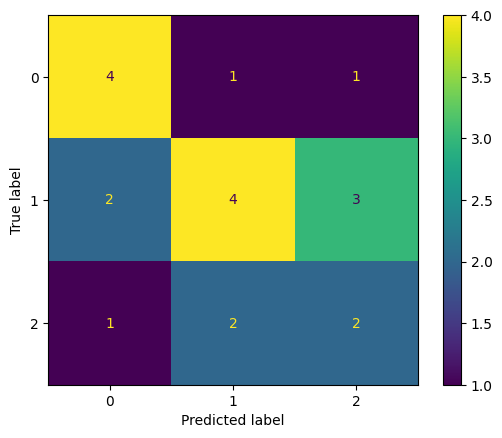

In [16]:
confusionMatrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)
cm_display.plot()
plt.show()


In [17]:
TruePositive0 = 0
TruePositive1 = 0
TruePositive2 = 0
TrueNegative0 = 0
TrueNegative1 = 0
TrueNegative2 = 0
TotalTruePositives = 0
FalsePositive0 = 0
FalsePositive1 = 0
FalsePositive2 = 0
TotalFalsePositives = 0
FalseNegative0 = 0
FalseNegative1 = 0
FalseNegative2 = 0
TotalFalseNegatives = 0
TotalPredictions = 20

for i in range(20):
  if predicted[i] == 1 & actual[i] == 1:
      TruePositive1 +=1
      TotalTruePositives +=1
  if predicted[i] == 0 & actual[i] == 0:
      TruePositive0 +=1
      TotalTruePositives +=1
  if predicted[i] == 2 & actual[i] == 2:
      TruePositive2 +=1
      TotalTruePositives +=1
  if predicted[i] == 0 & actual[i] == 1:
      FalsePositive0 +=1
      FalseNegative1 +=1
      TotalFalsePositives +=1
      TotalFalseNegatives +=1
  if predicted[i] == 0 & actual[i] == 2:
      FalsePositive0 +=1
      FalseNegative2 +=1
      TotalFalsePositives +=1
      TotalFalseNegatives +=1
  if predicted[i] == 1 & actual[i] == 0:
      FalsePositive1 +=1
      FalseNegative0 +=1
      TotalFalsePositives +=1
      TotalFalseNegatives +=1
  if predicted[i] == 1 & actual[i] == 2:
      FalsePositive1 +=1
      FalseNegative2 +=1
      TotalFalsePositives +=1
      TotalFalseNegatives +=1
  if predicted[i] == 2 & actual[i] == 0:
      FalsePositive2 +=1
      FalseNegative0 +=1
      TotalFalsePositives +=1
      TotalFalseNegatives +=1
  if predicted[i] == 2 & actual[i] == 1:
      FalsePositive2 +=1
      FalseNegative1 +=1
      TotalFalsePositives +=1
      TotalFalseNegatives +=1




In [18]:
#Calculate Accuracy: (True Positive + True Negative ) / Total Predictions
accuracy0 = (TruePositive0 + TrueNegative0) / TotalPredictions
accuracy1 = (TruePositive1 + TrueNegative1) / TotalPredictions
accuracy2 = (TruePositive2 + TrueNegative2) / TotalPredictions
print ("The accuracy for 0,1,2 is: ", accuracy0, accuracy1, accuracy2)


The accuracy for 0,1,2 is:  0.35 0.2 0.1


In [19]:
#Calculate Precision: True Positive / (True Positive + False Positive)
precision0 = TruePositive0 / (TruePositive0 + FalsePositive0)
precision1 = TruePositive1 / (TruePositive1 + FalsePositive1)
precision2 = TruePositive2 / (TruePositive2 + FalsePositive2)

print("The precision for 0,1,2 is: ", precision0, precision1, precision2)

The precision for 0,1,2 is:  1.0 0.4444444444444444 0.25


In [20]:
#Calculate Recall: True Positive / (True Positive + False Negative)
recall0 = TruePositive0 / (TruePositive0 + FalseNegative0)
recall1 = TruePositive1 / (TruePositive1 + FalseNegative1)
recall2 = TruePositive2 / (TruePositive2 + FalseNegative2)

print("The recall for 0,1,2 is: ", recall0, recall1, recall2)


The recall for 0,1,2 is:  0.3888888888888889 1.0 1.0


In [21]:
#Calculate F1-Score (micro, macro weighted)
f1Score0 = TruePositive0 / (TruePositive0 + .5 * (FalsePositive0 + FalseNegative0))
f1Score1 = TruePositive1 / (TruePositive1 + .5 * (FalsePositive1 + FalseNegative1))
f1Score2 = TruePositive2 / (TruePositive2 + .5 * (FalsePositive2 + FalseNegative2))
print("The f1-scores for 0,1,2 are: ", f1Score0, f1Score1, f1Score2)
#Micro

micro = TotalTruePositives / (TotalTruePositives + .5 * (TotalFalsePositives + TotalFalseNegatives))
print("The micro F1-Score is: ", micro)

#Macro
macro = (f1Score0 + f1Score1 + f1Score2) / 3
print("The macro F1-Score is: ", macro)


#Weighted
support0 = (TruePositive0 + FalseNegative0) / 100
support1 = (TruePositive1 + FalseNegative1) / 100
support2 = (TruePositive2 + FalseNegative2) / 100

weighted = (f1Score0 * support0) + (f1Score1 * support1) + (f1Score2 * support2)
print("The weighted F1-Score is: ", weighted)



The f1-scores for 0,1,2 are:  0.56 0.6153846153846154 0.4
The micro F1-Score is:  0.5416666666666666
The macro F1-Score is:  0.5251282051282051
The weighted F1-Score is:  0.13341538461538463


**Use UCI website (https://archive.ics.uci.edu/ml/datasets/iris) to download IRIS dataset. Explore webpage to know about the dataset and write a simple paragraph about the dataset.**

The dataset comprises of four measurements on each of the 50 plants of three different species of iris: versicolor, setosa, and virginica. All of this data was collected by the botanist Edga Anderson. The data set was first used to illustrate the new technique of linear discriminant analysis. Since then, it has been analyzed using a veriety of different clustering techniques, regressions, components, and much more.

In [22]:
from sklearn.datasets import load_iris
#I decided to load the iris this way because I could not figure out how to upload a file into my google collab
import numpy
import random
import itertools

iris = load_iris()

targetData = iris.target
irisData = iris.data

training_size = len(irisData) * .8
trainingArray = list(itertools.repeat(0, 120))
validation_size = len(irisData) * .1
validationArray = list(itertools.repeat(0, 15))
testing_size = len(irisData) * .1
testingArray = list(itertools.repeat(0, 15))

random.shuffle(irisData)

#create training array
i = 0
for x in range(0,120):
  trainingArray[i] = irisData[i]
  i += 1
a=0

#create validation array
for x in range(15):
  validationArray[a] = irisData[i]
  a +=1
  i+=1

a=0

#create testing array
for x in range(15):
  testingArray[a] = irisData[i]
  i+=1
  a +=1

#print(testingArray)


In [28]:
from sklearn.datasets import load_iris
#I decided to load the iris this way because I could not figure out how to import the iris.data into google collab.
import array
import numpy as np
import pandas as pd

#calculate Euclidian Distance
def EuclideanDistance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2            #(x1-x2)**2+(y1-y2)**2
    return sqrt(distance)

def ManhattenDistance(row1, row2):
    distance = 0
    for x1, x2 in zip(row1, row2):
        difference = x2 - x1
        absolute_difference = abs(difference)
        distance += absolute_difference
    return distance


#get neighbors
def GetNeighbors(train, test_row, num):
    distance = list() # []
    data = []
    for i in train:
        dist = ManhattenDistance(test_row,i) #EuclideanDistance(test_row, i)
        distance.append(dist)
        data.append(i)
    distance = array.array('f', distance)
    data = [array.array('f', row) for row in data]
    index_dist = sorted(range(len(distance)), key=lambda i: distance[i])
    data = [data[i] for i in index_dist]
    neighbors = data[:num]

    #print(neighbors)
    #print(num)
    return neighbors

#predict what type of iris they will be
def predictClassification(train, test_row, num):
    Neighbors = GetNeighbors(train, test_row, num)
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(Classes, key= Classes.count)
    return prediction

#calculate the accuracy
def Evaluate(yTrue, yPred):
    truePositive = 0
    falsePositive = 0
    falseNegative = 0
    #print(yPred)
    newYPred = np.round_(yTrue, decimals = 3)
    #print(newYPred)
    for i in range(len(yTrue)):
        if yTrue[i] == newYPred[i]:
            truePositive +=1
        if yTrue[i] <= newYPred[i]:
             falsePositive += 1
        if yTrue[i] >= newYPred[i]:
             falseNegative += 1
    accuracy = truePositive/len(yTrue)
    return accuracy, truePositive, falsePositive, falseNegative

def getF1Score(yTrue, yPred, class_label, TP, FP, FN):

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def calculate_micro_f1_score(yTrue, yPred, TP):
    total_samples = len(yTrue)
    #print(TP)
    micro_precision = TP / total_samples
    micro_recall = TP / total_samples
    print (micro_precision)
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)
    return micro_f1_score

def calculate_macro_f1_score(yTrue, yPred, TP, FP, FN):
    unique_classes = set(yTrue + yPred)
    macro_f1_scores = []

    for class_label in unique_classes:
        f1_score = getF1Score(yTrue, yPred, class_label, TP, FP, FN)
        macro_f1_scores.append(f1_score)

    macro_f1_score = sum(macro_f1_scores) / len(macro_f1_scores)
    return macro_f1_score

def calculate_weighted_f1_score(yTrue, yPred, TP, FP, FN):
    unique_classes = set(yTrue + yPred)
    class_counts = {class_label: (yTrue.count(class_label), yPred.count(class_label)) for class_label in unique_classes}
    weighted_f1_scores = []

    for class_label in unique_classes:
        true_samples, pred_samples = class_counts[class_label]
        weight = true_samples / len(yTrue)
        f1_score = getF1Score(yTrue, yPred, class_label, TP, FP, FN)
        weighted_f1_scores.append(weight * f1_score)

    weighted_f1_score = sum(weighted_f1_scores)
    return weighted_f1_score

data = [iris_row + [target_value] for iris_row, target_value in zip(irisData, targetData)]
#print(data)

yPred = []
yTrue = [row[-1] for row in testingArray]

for i in testingArray:
    prediction = predictClassification(trainingArray, i, 10)
    yPred.append(prediction)

accuracy, truePositive, falsePositive, falseNegative = Evaluate(yTrue, yPred)

#print(yPred)

print("The accuracy is: ", accuracy)

precision = truePositive / (truePositive + falsePositive)

print("The precision is: ", precision)

recall = truePositive / (truePositive + falseNegative)

print("The recall is: ", recall)


micro_f1 = calculate_micro_f1_score(yTrue, yPred, truePositive)
macro_f1 = calculate_macro_f1_score(yTrue, yPred, truePositive, falsePositive, falseNegative)
weighted_f1 = calculate_weighted_f1_score(yTrue, yPred, truePositive, falsePositive, falseNegative)

print("Micro F1-Score:", micro_f1)
print("Macro F1-Score:", macro_f1)
print("Weighted F1-Score:", weighted_f1)


The accuracy is:  1.0
The precision is:  0.5
The recall is:  0.5
1.0
Micro F1-Score: 1.0
Macro F1-Score: 0.5
Weighted F1-Score: 0.5


I noticed that when comparing the manhatten distance with the eucledian distance method on the iris data set, that the Manhatten distance appeared to perform better. With Eucledian, my accuracy was lower than with Manhatten. I did also notice that with the Manhatten method had a higher precision than the Eucledian Method. Manhatten distance is typically preffered over Eucledian distance where there is a high dimensionality in the data. For this reason, the Manhatten distance worked better for my data.